In [24]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/2d_sims.jl");
include("/home/jm2386/Active_Lattice/src/2d_plot.jl");

v1.1
v2.1


In [22]:
#
# MIPS
#
Params = []
DT, DR, N, Nθ, Δx, Lx, Ly, δt, δ, ϕa, ϕp = (1.0, 1.0, 32, 20, 0.04, 2.0, 2.0, 1e-5, 0.1, 0.45, 0.0);
T, save_interval, param_name = (20.0, 0.1, "test")
map([50.]) do v0
    param = _2d_new_param(DT, v0, DR, N, Nθ, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(Params,param)
end
#
# NRIPS
#
DT, DR, N, Nθ, Δx, Lx, Ly, δt, δ, ϕa, v0 = (1.0, 1.0, 32, 20, 0.04, 2.0, 2.0, 1e-5, 0.1, 0.5, 15.0);
T, save_interval, param_name = (20.0, 0.1, "test")
#Params = [] 
map(0.2) do ϕp
    param = _2d_new_param(DT, v0, DR, N, Nθ, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(Params,param)
end
param = Params[1]
ts, ηs = load_compress_sim(param);
t, η = ts[end], ηs[end];

fast load


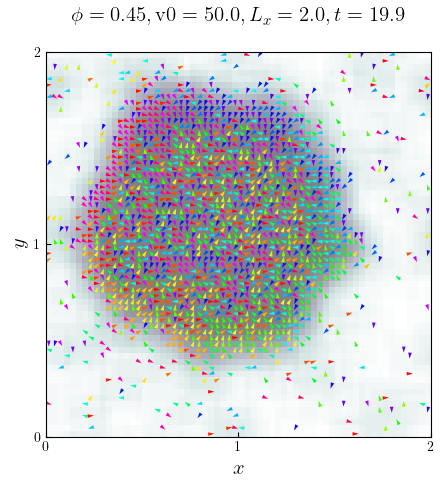

In [11]:
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
# add image
    t, η = ts[end], ηs[end]
    plot_eta!(ax, param, t, η; title = true, ϵ = 0.1)
#
display(fig)

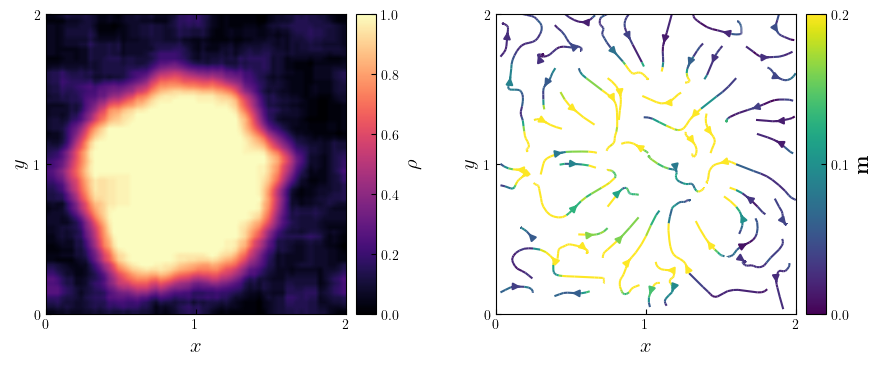

In [25]:
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,5))
# add image
    ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
    plot_sim_rho(ax, cbar_ax, param, η; cmin = 0.0, cmax = 1.0, cbar = true, ϵ = 0.1)
    ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
    plot_sim_mag(ax, cbar_ax, param, η; cmin = 0.0, cmax = 0.2, cbar = true, density = 0.5, ϵ = 0.1)
#
display(fig)

In [12]:
using PyCall
@pyimport matplotlib.animation as anim

fig, axs = plt.subplots(1, 1, figsize=(5,5))
@unpack save_interval = param
scale_factor = 1
interval  = save_interval*scale_factor*1000
frames    = Int64( length(ts)/scale_factor ÷ 1)
function makeframe(i)
        clf()
        ax = fig.add_subplot(111)
        t, η = ts[i+1], ηs[i+1]
        plot_eta!(ax, param, t, η; title = true, ϵ = 0.1)
        return fig
end
myanim = anim.FuncAnimation(fig, makeframe, frames=frames, interval=interval)
# Convert it to an MP4 movie file and saved on disk in this format.
        filename, pathname = sim_vid_save_name(param,ts[end])
        mkpath(pathname)
        myanim[:save](filename, bitrate=-1, dpi= 100, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

In [26]:
using PyCall
@pyimport matplotlib.animation as anim

fig = plt.figure(figsize=(10,5))
@unpack save_interval = param
scale_factor = 1
interval  = save_interval*scale_factor*1000
frames    = Int64( length(ts)/scale_factor ÷ 1)
function makeframe(i)
        clf()
        t, η = ts[i+1], ηs[i+1]
        # add image
                ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
                plot_sim_rho(ax, cbar_ax, param, η; cmin = 0.0, cmax = 1.0, cbar = true)
                ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
                plot_sim_mag(ax, cbar_ax, param, η; cmin = -0.0, cmax = 0.6, cbar = true, density = 0.5)
        #
        return fig
end
myanim = anim.FuncAnimation(fig, makeframe, frames=frames, interval=interval)
# Convert it to an MP4 movie file and saved on disk in this format.
        filename, pathname = sim_vid_smooth_save_name(param,ts[end])
        mkpath(pathname)
        myanim[:save](filename, bitrate=-1, dpi= 100, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])